In [141]:
#importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [89]:
#importing the dataset from github
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')

In [90]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [91]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [93]:
data.shape
print('Number of Rows:',data.shape[0])
print('Number of Column:',data.shape[1])

Number of Rows: 1338
Number of Column: 7


In [94]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [95]:
data.drop_duplicates(inplace=True)
data.shape

(1337, 7)

# STATISTICAL DISTRIBUTION OF DATA

In [96]:
data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337,1337.000000,1337.000000,1337,1337,1337.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,675,NaN,NaN,1063,364,NaN
mean,39.222139,NaN,30.663452,1.095737,NaN,NaN,13279.121487
std,14.044333,NaN,6.100468,1.205571,NaN,NaN,12110.359656
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.290000,0.000000,NaN,NaN,4746.344000
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9386.161300
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16657.717450


# REPLACING THE CATEGORICAL COLUMNS

In [97]:
df1=pd.get_dummies(data[['sex','smoker','region']])
df1

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1,0,0,1,0,0,0,1
1,0,1,1,0,0,0,1,0
2,0,1,1,0,0,0,1,0
3,0,1,1,0,0,1,0,0
4,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,0,1,1,0,0,1,0,0
1334,1,0,1,0,1,0,0,0
1335,1,0,1,0,0,0,1,0
1336,1,0,1,0,0,0,0,1


In [98]:
data=pd.concat([data,df1],axis=1)
data

,age,sex,bmi,children,smoker,region,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0,1,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0,1,1,0,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,1,0,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,1,0,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,1,0,0,1,0,0
1334,18,female,31.920,0,no,northeast,2205.98080,1,0,1,0,1,0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,1,0,1,0,0,0,1,0
1336,21,female,25.800,0,no,southwest,2007.94500,1,0,1,0,0,0,0,1


In [99]:
data.drop(['sex','smoker','region'],axis=1,inplace=True)

In [100]:
data.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [101]:
data.shape

(1337, 12)

In [102]:
data.describe()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487,0.495138,0.504862,0.795064,0.204936,0.242334,0.242334,0.272251,0.243082
std,14.044333,6.100468,1.205571,12110.359656,0.500163,0.500163,0.403806,0.403806,0.428655,0.428655,0.445285,0.429104
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.290000,0.000000,4746.344000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9386.161300,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.700000,2.000000,16657.717450,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


bmi seems to has some outliers,but we can not say they are outliers.Because( 75% of bmi=34 and max=53) above 53 bmi indicates a person has obesity.

# VISUALIZATON OF DATA

# DISTPLOT

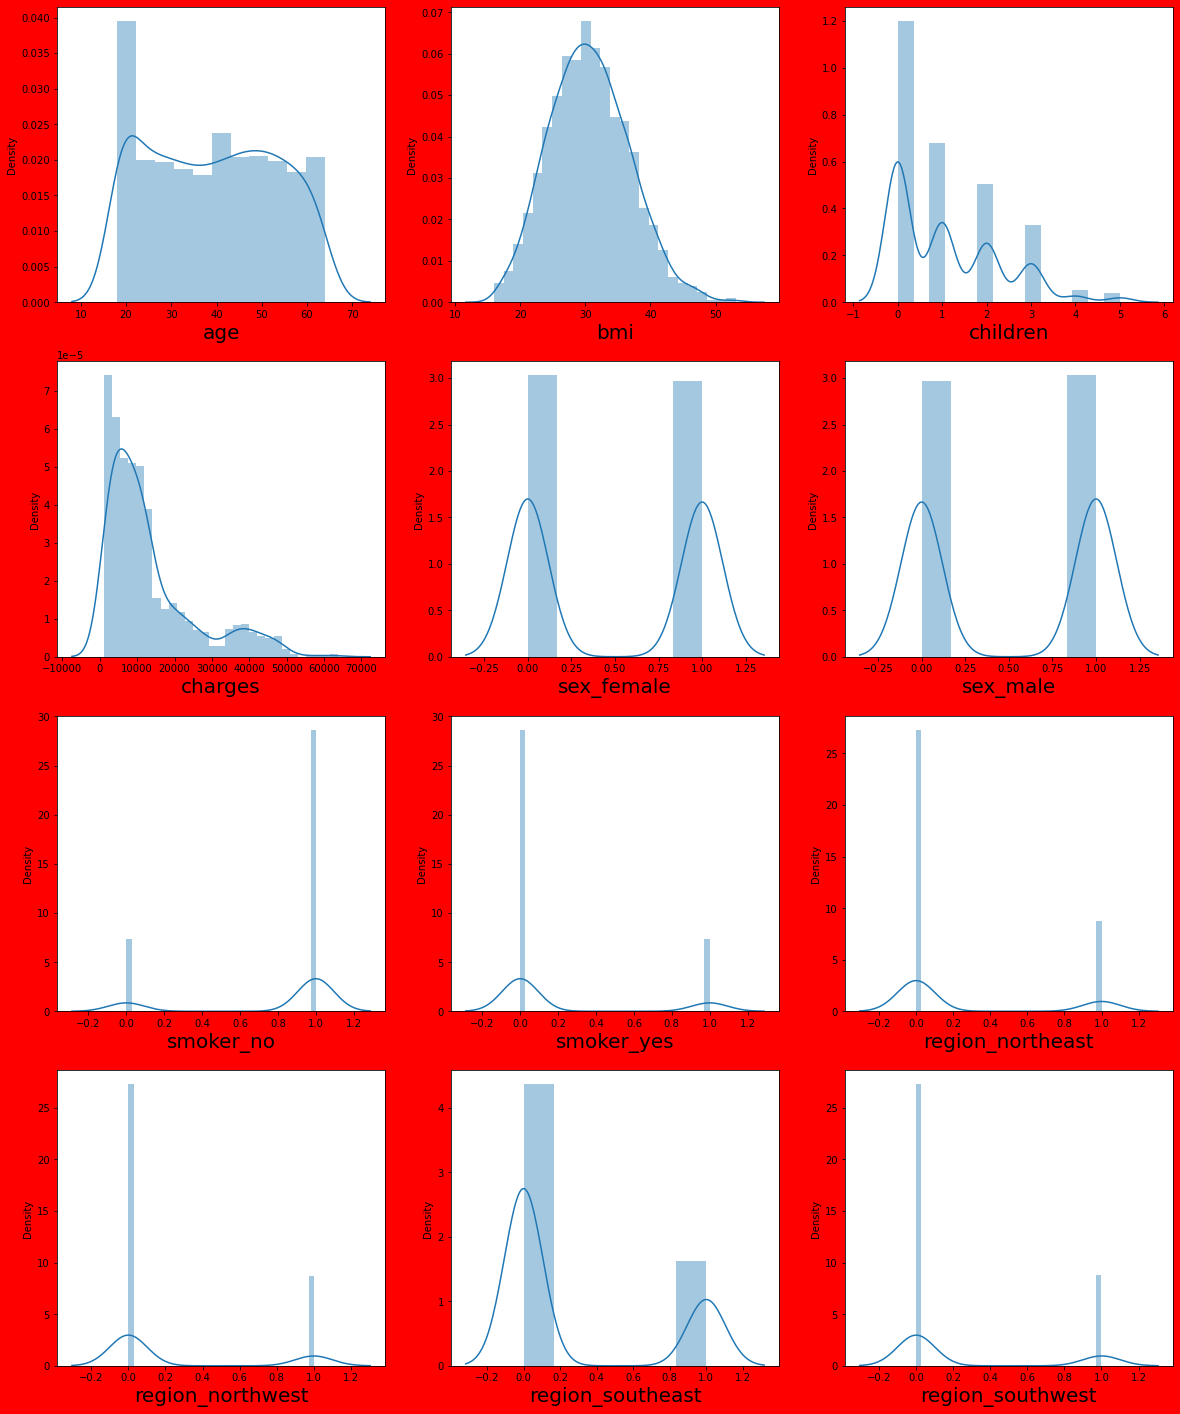

In [103]:
plt.figure(figsize=(20,25),facecolor='red')
plotnumber=1
for column in data:
    #if plotnumber<= 9
    ax=plt.subplot(4,3,plotnumber)
    sns.distplot(data[column])
    plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# BOXPLOT

In [104]:
df_features=data.drop('charges',axis=1)

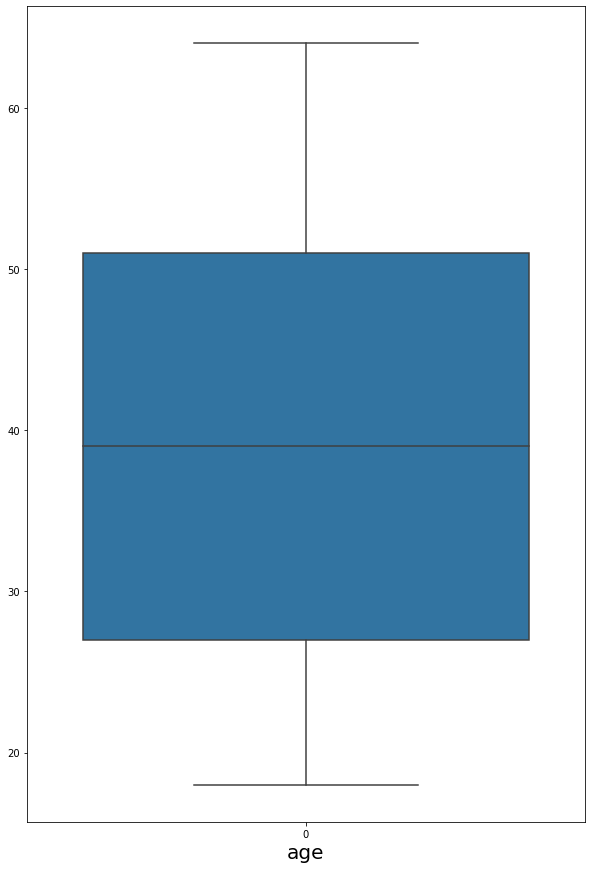

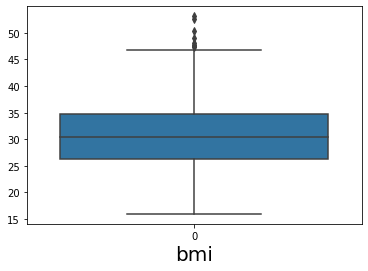

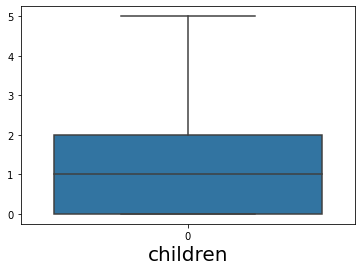

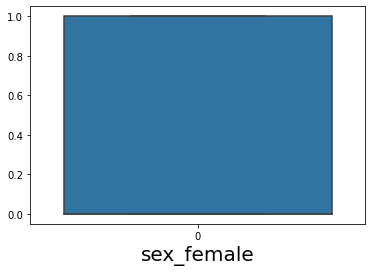

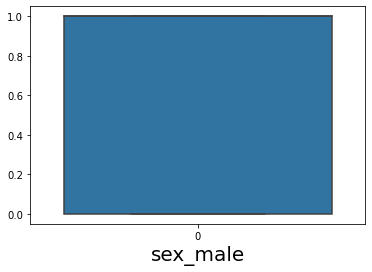

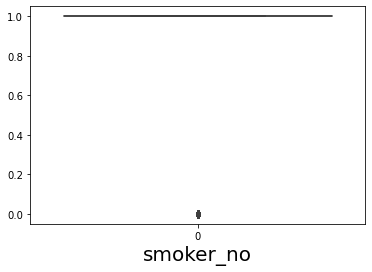

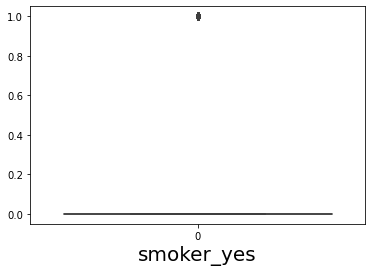

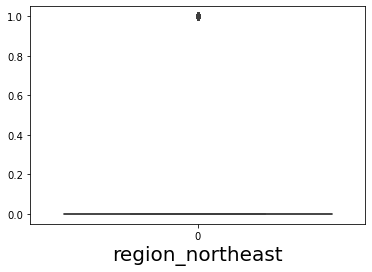

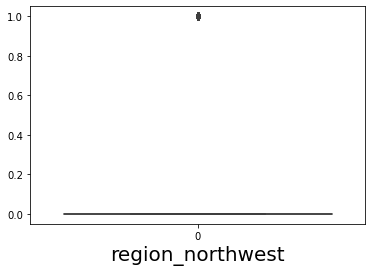

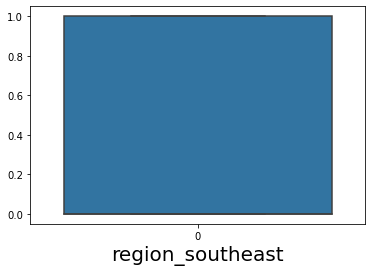

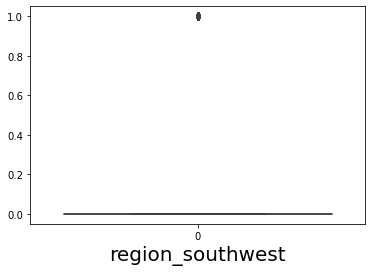

In [105]:
plt.figure(figsize=(10,15))
graph=1
for column in df_features:
    if graph<=12:
        #plt.subplot(2,6,graph)
        ax=sns.boxplot(data=df_features[column])
        plt.xlabel(column,fontsize=20)
     
    graph+=1
    plt.show()

# APPLYING LOG TRANSFORMATION ON CONTINUOUS VARIABLE( here in BMI)

In [106]:
data['bmi']=np.log(data['bmi'])

We found previously that bmi 53 is not outlier,it is a valid data.So just for normalizing the data without loosing the actual values,we chose log transformation technique

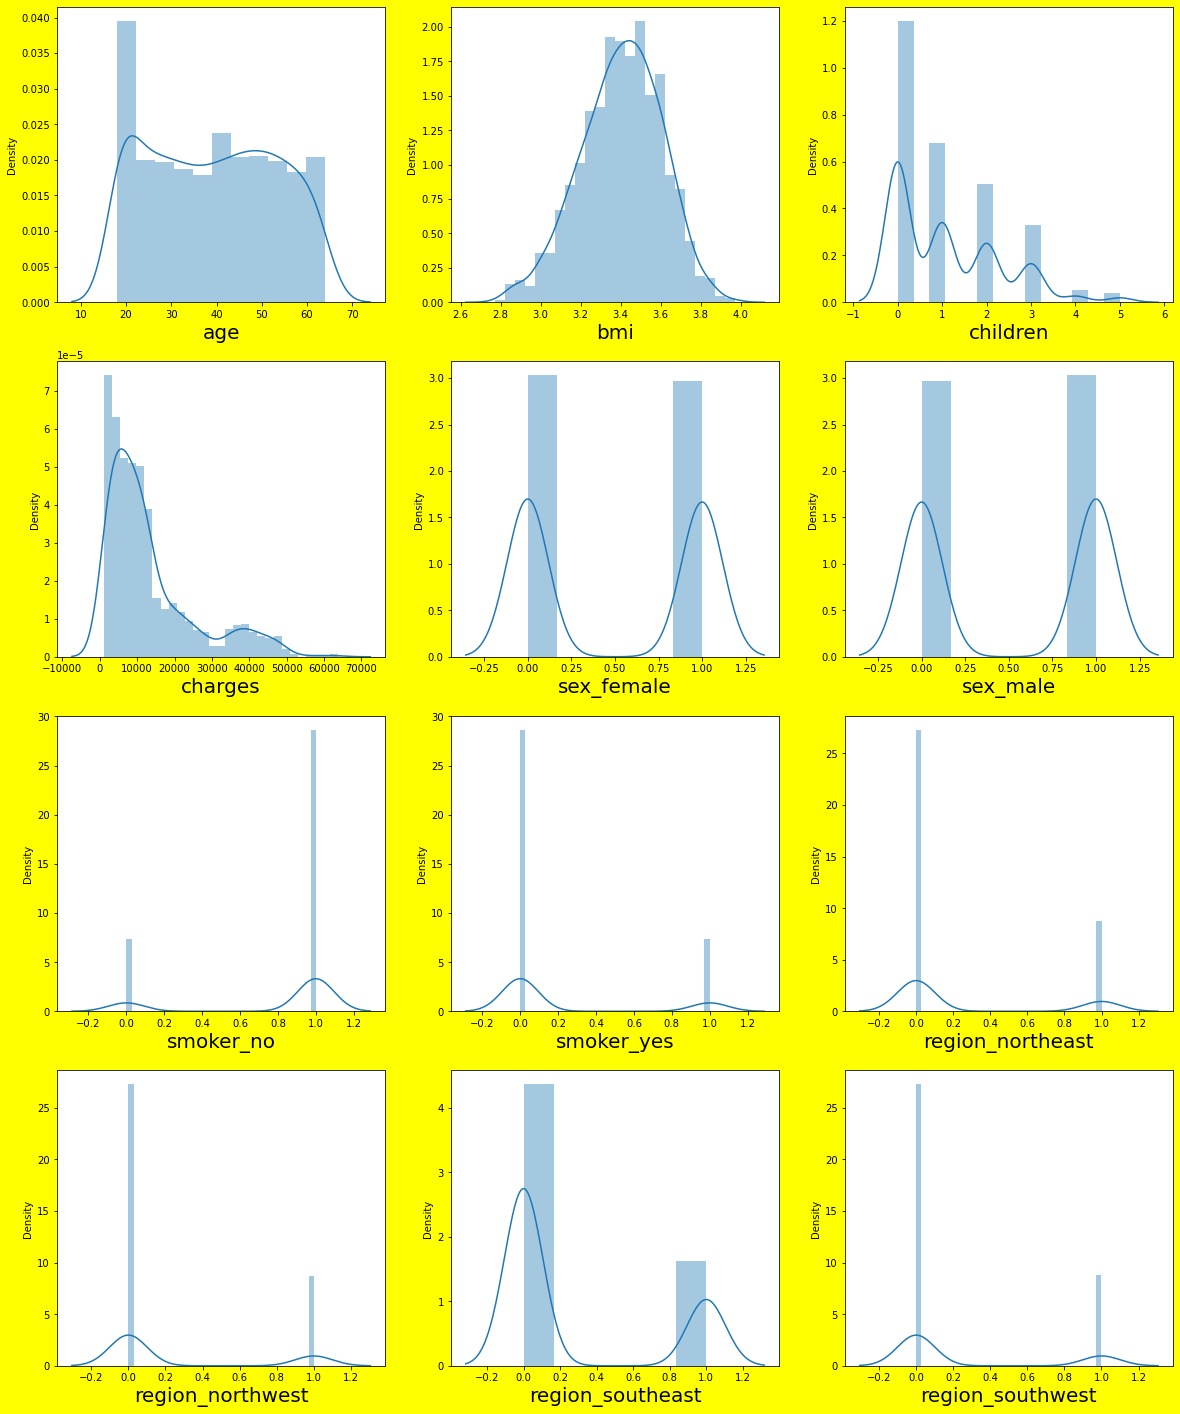

In [107]:
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber=1
for column in data:
    #if plotnumber<= 9
    ax=plt.subplot(4,3,plotnumber)
    sns.distplot(data[column])
    plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

Just to confirm that outlier is treated well in bmi.

# FEATURE VS TARGET CORELATION

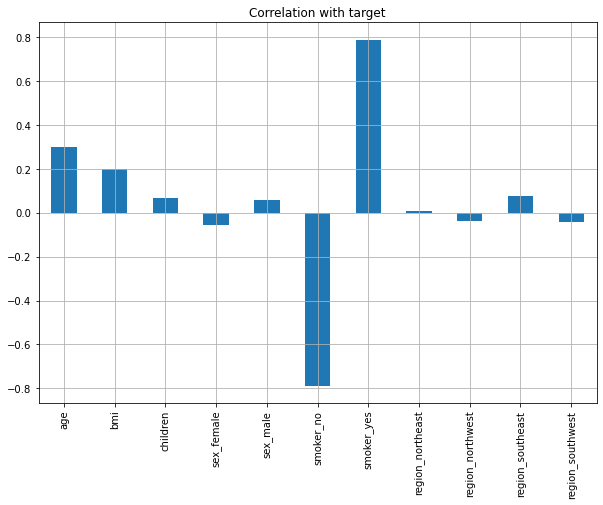

In [108]:
data.drop('charges',axis=1).corrwith(data.charges).plot(kind='bar',grid=True,figsize=(10,7),title="Correlation with target")
plt.show()

# FEATURE VS FEATURE CORELATION(HEATPLOT)

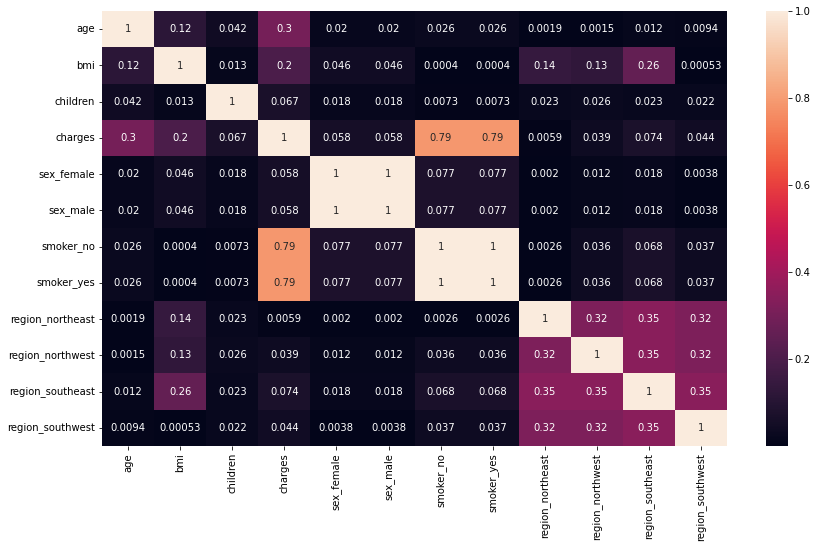

In [109]:
df_corr=data.corr().abs()
plt.figure(figsize=(14,8))
sns.heatmap(df_corr,annot=True,annot_kws={'size':10})
plt.show()

age,bmi and smoker contributing more to our target variable.We can drop regions,sex,children.

# SCATTER PLOT

In [185]:
X=data.drop('charges',axis=1)
y=data['charges']

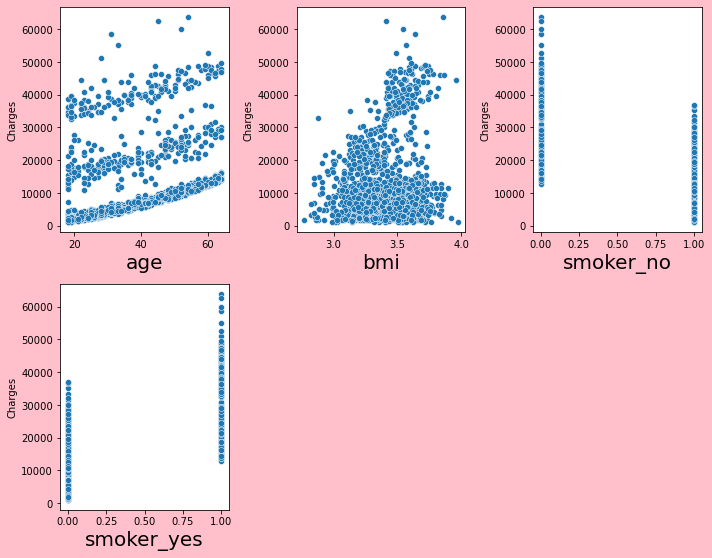

In [187]:
plt.figure(figsize=(10,15),facecolor='pink')
plotnumber=1
for column in X:
    #if plotnumber<= 9
    ax=plt.subplot(4,3,plotnumber)
    sns.scatterplot(X[column],y)
    plt.xlabel(column,fontsize=20)
    plt.ylabel('Charges')
    plotnumber+=1
plt.tight_layout()

We can clearly see that these features showing some similar trend with target variable.So we can also say that they are highly contributing.

In [110]:
data.drop(['sex_male','sex_female','children','region_northeast','region_northwest','region_southeast','region_southwest'],axis=1,inplace=True)

In [111]:
data.head()

,age,bmi,charges,smoker_no,smoker_yes
0,19,3.328627,16884.92400,0,1
1,18,3.519573,1725.55230,1,0
2,28,3.496508,4449.46200,1,0
3,33,3.122585,21984.47061,1,0
4,32,3.363149,3866.85520,1,0


# SPLITTING THE DATASET INTO TRAIN AND TEST DATA

In [112]:
X=data.drop('charges',axis=1)
y=data['charges']

In [116]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

# IMPORTING MODELS

In [117]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor 
import  xgboost as xgb

# LINEAR REGRESSION

In [134]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred1=lr.predict(X_test)
r2_score(y_test,y_pred1)

0.803829324372762

# SUPPORT VECTOR MACHINE

In [136]:
svm=SVR()
svm.fit(X_train,y_train)
y_pred2=svm.predict(X_test)
r2_score(y_test,y_pred2)

-0.1340820698916465

# RANDOM FOREST

In [138]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred3=rf.predict(X_test)
r2_score(y_test,y_pred3)

0.8752597237225563

# GradientBoosting

In [139]:
gbdt=GradientBoostingRegressor()
gbdt.fit(X_train,y_train)
y_pred4=gbdt.predict(X_test)
r2_score(y_test,y_pred4)

0.9017410581601415

# ADABOOST


ada.fit(X_train,y_train)
y_pred5=ada.predict(X_test)
r2_score(y_test,y_pred5)

# XGBOOST

In [119]:
xgb=xgb.XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [126]:
y_pred6=xgb.predict(X_test)

In [127]:
r2_score(y_test,y_pred6)

0.870791564778866

From the above models we can see that gradientboost classifier has the greatest accuracy.(Higher the r2 score higher is the accuracy)

# EVALUATING THE MODELS

# MEAN ABSOLUTE ERROR

In [147]:
MAE1=metrics.mean_absolute_error(y_test,y_pred1)
MAE2=metrics.mean_absolute_error(y_test,y_pred2)
MAE3=metrics.mean_absolute_error(y_test,y_pred3)
MAE4=metrics.mean_absolute_error(y_test,y_pred4)
MAE5=metrics.mean_absolute_error(y_test,y_pred5)
MAE6=metrics.mean_absolute_error(y_test,y_pred6)


print(MAE1,MAE2,MAE3,MAE4,MAE5,MAE6)

4266.346257189468 9236.121095096547 2682.8064485021855 2399.9728729879434 4998.801894461661 2727.482155526819


# MEAN SQUARED ERROR

In [148]:
MSE1=metrics.mean_squared_error(y_test,y_pred1)
MSE2=metrics.mean_squared_error(y_test,y_pred2)
MSE3=metrics.mean_squared_error(y_test,y_pred3)
MSE4=metrics.mean_squared_error(y_test,y_pred4)
MSE5=metrics.mean_squared_error(y_test,y_pred5)
MSE6=metrics.mean_squared_error(y_test,y_pred6)


print(MSE1,MSE2,MSE3,MSE4,MSE5,MSE6)

36047551.23354448 208394457.4628719 22921782.19614236 18055676.409335706 32110905.74538947 23742833.497144938


# ROOT MEAN SQUARED ERROR

In [152]:
RMSE1=np.sqrt(mean_squared_error(y_test,y_pred1))
RMSE2=np.sqrt(mean_squared_error(y_test,y_pred2))
RMSE3=np.sqrt(mean_squared_error(y_test,y_pred3))
RMSE4=np.sqrt(mean_squared_error(y_test,y_pred4))
RMSE5=np.sqrt(mean_squared_error(y_test,y_pred5))
RMSE6=np.sqrt(mean_squared_error(y_test,y_pred6))


print(RMSE1,RMSE2,RMSE3,RMSE4,RMSE5,RMSE6)

6003.961295140441 14435.873976412786 4787.669808596073 4249.197148795959 5666.648546132844 4872.661849250873


Higher the evaluation metrics value,lower is the accuracy.

In [162]:
import pandas as pd
pd.DataFrame({'Model':['lr','svm','rf','gbdt','ada','xgb'],'Accuracy':[r2_score(y_test,y_pred1)*100,r2_score(y_test,y_pred2)*100,r2_score(y_test,y_pred3)*100,r2_score(y_test,y_pred4)*100,r2_score(y_test,y_pred5)*100,r2_score(y_test,y_pred6)*100]})

,Model,Accuracy
0,lr,80.382932
1,svm,-13.408207
2,rf,87.525972
3,gbdt,90.174106
4,ada,82.525254
5,xgb,87.079156


SO,GBDT IS THE BEST MODEL.

# SAVING THE BEST MODEL

In [164]:
X=data.drop('charges',axis=1)
y=data['charges']

In [166]:
data.head()

,age,bmi,charges,smoker_no,smoker_yes
0,19,3.328627,16884.92400,0,1
1,18,3.519573,1725.55230,1,0
2,28,3.496508,4449.46200,1,0
3,33,3.122585,21984.47061,1,0
4,32,3.363149,3866.85520,1,0


In [167]:
from sklearn.ensemble import GradientBoostingRegressor
gbdt=GradientBoostingRegressor()
gbdt.fit(X_train,y_train)

GradientBoostingRegressor()

In [168]:
import pickle
pickle.dump(gbdt,open('MEDICALCOST_PERSONAL INSURANCE PREDICTION','wb'))